# Problem Statement

You are running a supermarket mall and through membership cards, you have some basic data about your customers like customer ID, age, gender, annual income and spending score.
You want to understand the customers, such as who the target customers are, so that the marketing team can make sense of them and plan strategy accordingly. Since the customers' spending scores are the main factor for the marketing team, the main objective is to find meaningful clusters of customers with respect to their spending scores.

For this purpose, I use an unsupervised machine learning algorithm namely k-means on the Mll customer data with 200 samples obtained from the Kaggle dataset.

## 1. Import the required libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## 2. Reading the dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2.1. Understanding the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [5]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [6]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [7]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [8]:
# drop the ID that not relevant to the context
df.drop(['CustomerID'], axis = 1, inplace=True)

## 3. EDA

### 3.1. Visualize the distributions of the featurs
To do this, I visualize the relationship between the distributions of *age*, *annual income*, and *spending score* of the customers (diagonal) and their correlations.


<Figure size 300x300 with 0 Axes>

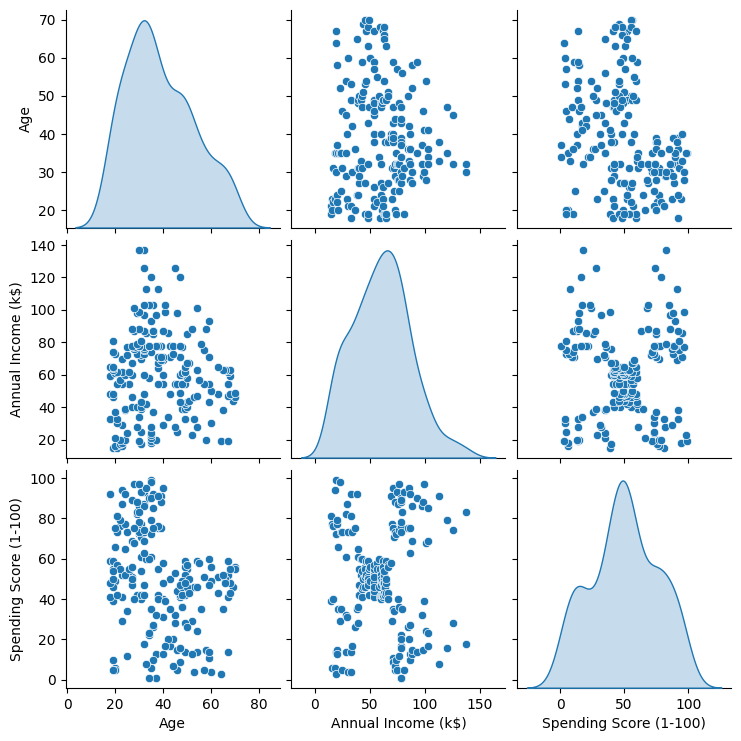

In [9]:
# Pairwise relationship between Variables of the Dataset
plt.figure(figsize=(3,3))
sns.pairplot(df,diag_kind='kde')
plt.show()

#### 3.1.1. Age and Gender


According to the bar chart, we have more female samples than males.

In addition, the histogram shows that the age of the visitors is skewed toward the younger age groups. Most mall visitors are between the ages of 20 and 35.

I also examine the distribution of age with respect to the gender of the customers. According to the figure, in the younger age groups number of females are greater than the mails and it changes in the older age groups (> 55 years.) 

To better analyze the age groups, I broke the customer age into several groups, including 18-25, 26-35, 36-45, 46-55, 55+. According to the age group plot, the 26-35 year old customers are the largest group. This is true for both males and females. 

<AxesSubplot: title={'center': 'Age w.r.t. Gender'}, xlabel='Age', ylabel='Count'>

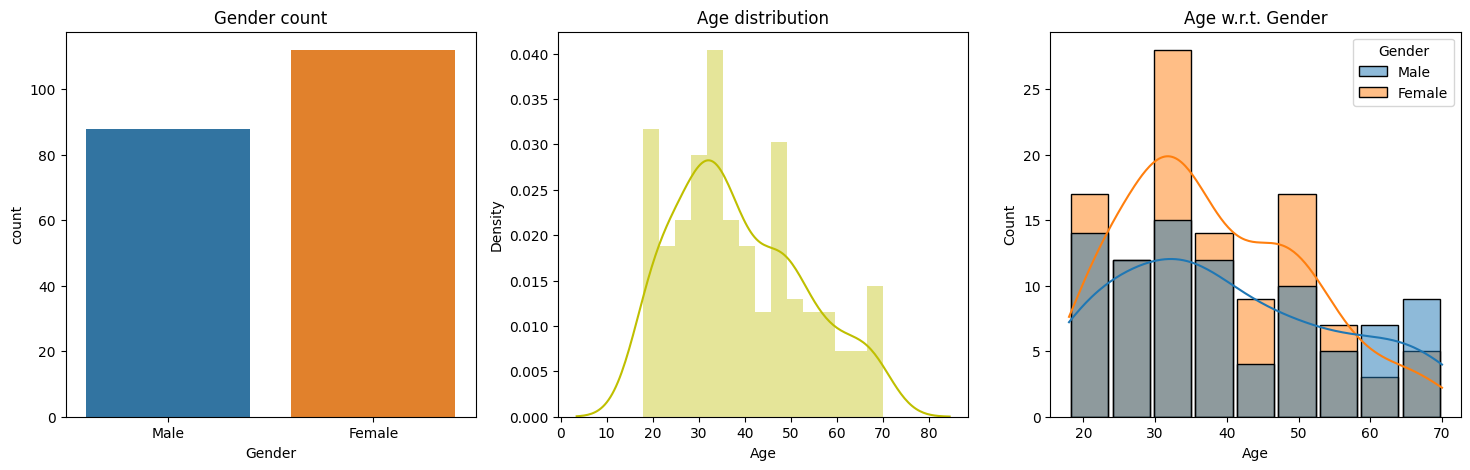

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18,5)


ax[0].set_title('Gender count')
sns.countplot(data=df, x='Gender', ax=ax[0])

ax[1].set_title('Age distribution')
sns.distplot(df['Age'], color= 'y',bins=15, ax=ax[1])


ax[2].set_title('Age w.r.t. Gender')
sns.histplot(data=df, x='Age',kde=True,hue='Gender',shrink=.9, ax=ax[2])

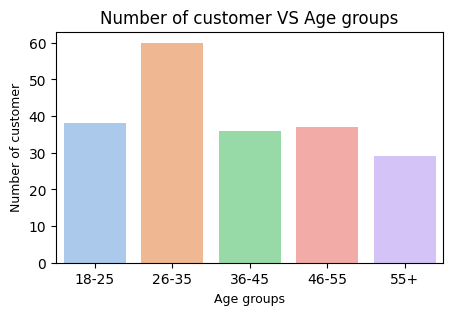

In [11]:
# Segement the age into different category to analize it easer

age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55up   = df.Age[df.Age >= 56]

age_range    = ['18-25','26-35','36-45','46-55','55+']
len_age   =    [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55up.values)]

plt.figure(figsize=(5,3))

sns.barplot(x= age_range, y=len_age , palette='pastel')

plt.title('Number of customer VS Age groups',fontsize=12)
plt.xlabel('Age groups',fontsize=9)
plt.ylabel('Number of customer',fontsize=9)

plt.show()

## 3.1.2. Annual Income, Spending Score, Gender


The annual income hostogram shows that the customers' annual income is normally distributed. It can be seen that there is no sample in the dataset with an annual income of less than 20 k. To better analyze the annual income groups, I have segmented the incomes into several ranges, as can be seen in the following chart. It shows that most customers earn between 60 and 90k annually, and only a few earn more than 120k. 

I also segmented the spending values into several groups. As you can see, the 41-60 range is the largest score group.
In addition, the two box plots show that range (variation) of the spending score is larger than that of the annual income.

I also plot the annual income against the spending score with respect to the gender of the customers. The scatter plot shows that customers with annual incomes between 20-40 and 80-100 have higher Spending Scores. In addition, a large portion of the customers are with an annual income of 50k$ and Spending Score of 50 (average annual income have average spending scoere). Moreover, there is no meaningful pattern between the gender of customers and their annual income and spending scores.

The two bar charts compare the males and females on their annual income and spending scores. As can be seen, females earn slightly less than males, but they have slightly higher spending scores.


<AxesSubplot: title={'center': 'Gender VS Spending Score'}, xlabel='Spending Score (1-100)', ylabel='Gender'>

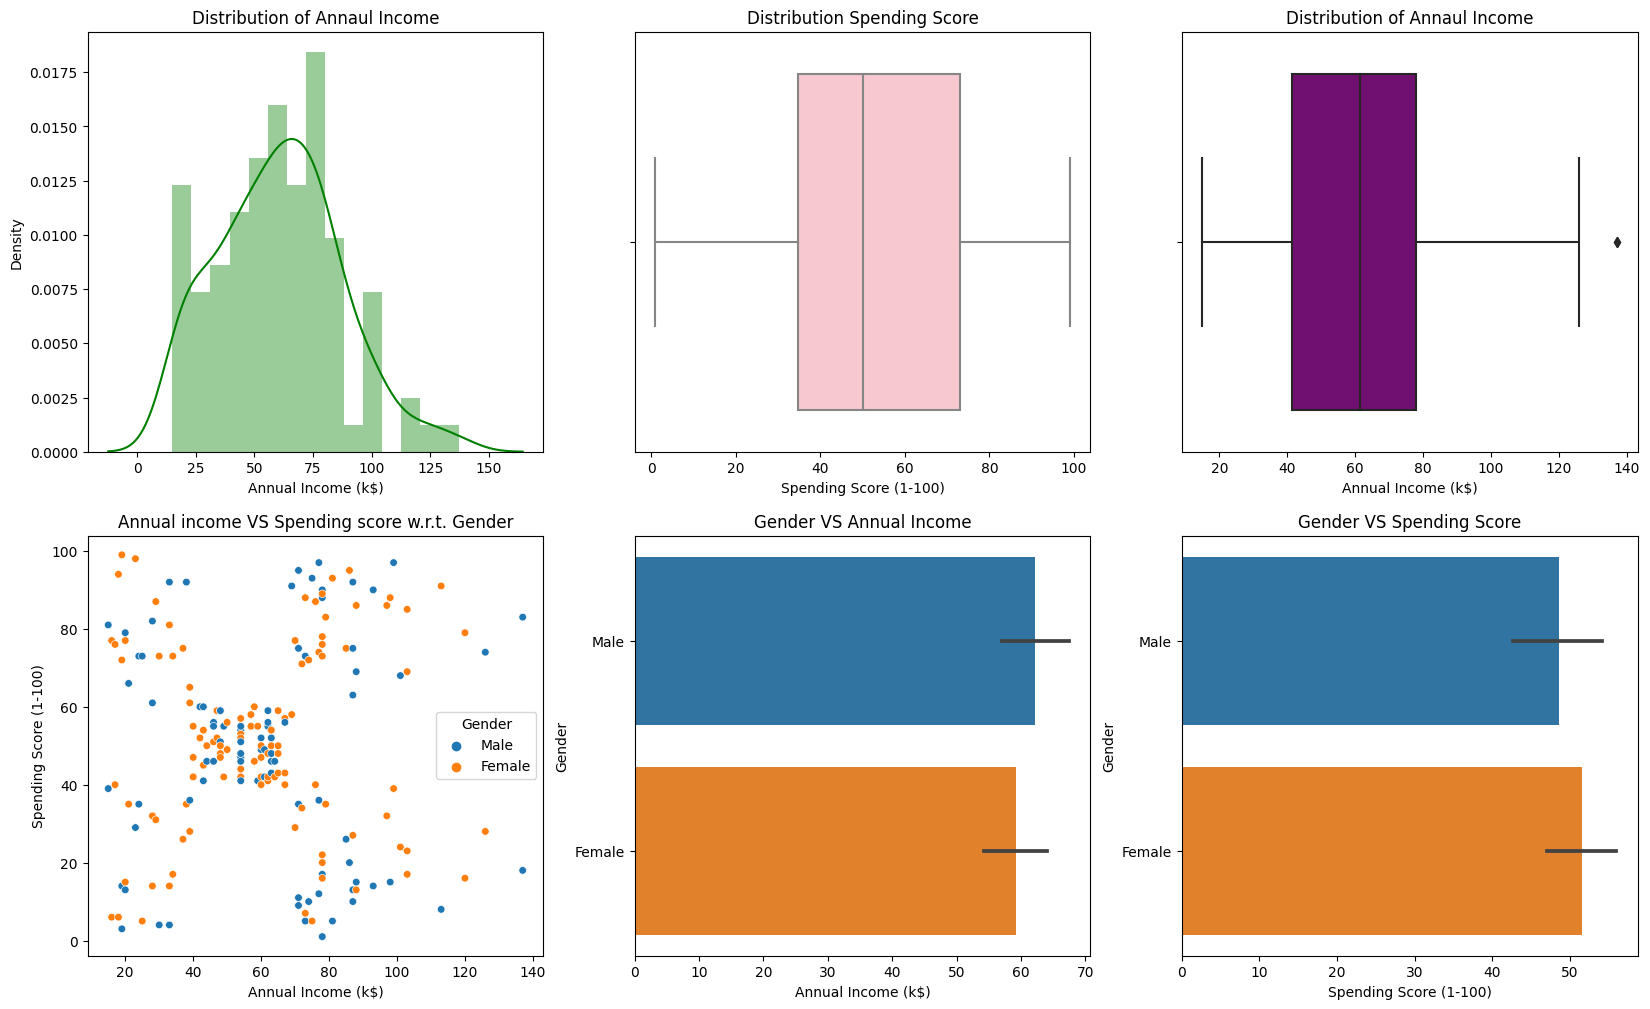

In [12]:
# Average Income distribution by Gender
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(20,12)

ax[0][0].set_title('Distribution of Annaul Income')
sns.distplot(df['Annual Income (k$)'], color= 'g',bins=15, ax=ax[0][0])

ax[0][1].set_title('Distribution Spending Score')
sns.boxplot(x=df['Spending Score (1-100)'], color ='Pink', ax=ax[0][1])

ax[0][2].set_title('Distribution of Annaul Income')
sns.boxplot(x=df['Annual Income (k$)'], color='Purple', ax=ax[0][2])


ax[1][0].set_title('Annual income VS Spending score w.r.t. Gender')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue = 'Gender',s=30, ax=ax[1][0])

ax[1][1].set_title('Gender VS Annual Income')
sns.barplot(y='Gender',x='Annual Income (k$)', data=df, ax=ax[1][1])

ax[1][2].set_title('Gender VS Spending Score')
sns.barplot(y='Gender',x='Spending Score (1-100)', data=df, ax=ax[1][2])


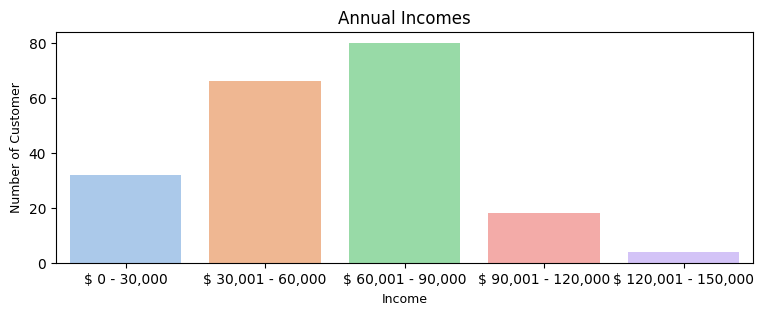

In [13]:
# Segment customer income and visualize the customer 
# visualize the number of customers according to their annual income. 
#The majority of the customers have annual income in the range 60000 and 90000.


ai0_30 =   df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0)  & (df['Annual Income (k$)'] <= 30)]
ai31_60 =  df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
ai61_90 =  df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
ai91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
ai121_150= df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121)& (df['Annual Income (k$)'] <= 150)]

aix = ['$ 0 - 30,000', '$ 30,001 - 60,000', '$ 60,001 - 90,000', '$ 90,001 - 120,000', '$ 120,001 - 150,000']
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(9,3))
sns.barplot(x=aix, y=aiy, palette='pastel')

plt.title('Annual Incomes',fontsize=12)
plt.xlabel('Income',fontsize=9)
plt.ylabel('Number of Customer',fontsize=9)
plt.show()

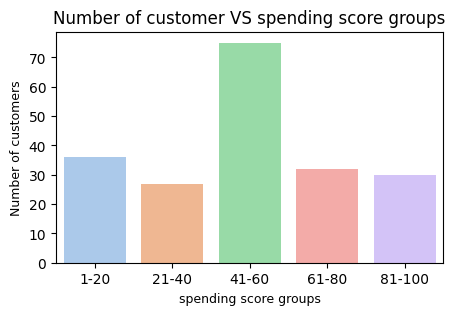

In [14]:
# Segment the Spending Score to undersatnd it better
# visualize the number of customers according to their spending scores. 

ss1_20  = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss81_100= df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

SSX = ['1-20', '21-40', '41-60', '61-80', '81-100']
SSY = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(5,3))
sns.barplot(x=SSX, y=SSY, palette='pastel')
plt.title('Number of customer VS spending score groups',fontsize=12)
plt.xlabel('spending score groups',fontsize=9)
plt.ylabel('Number of customers',fontsize=9)

plt.show()

### 3.2. Correlations between the numerical features
The following heatmap illustrates the correlations between all the features. It shows that the features are not correlated

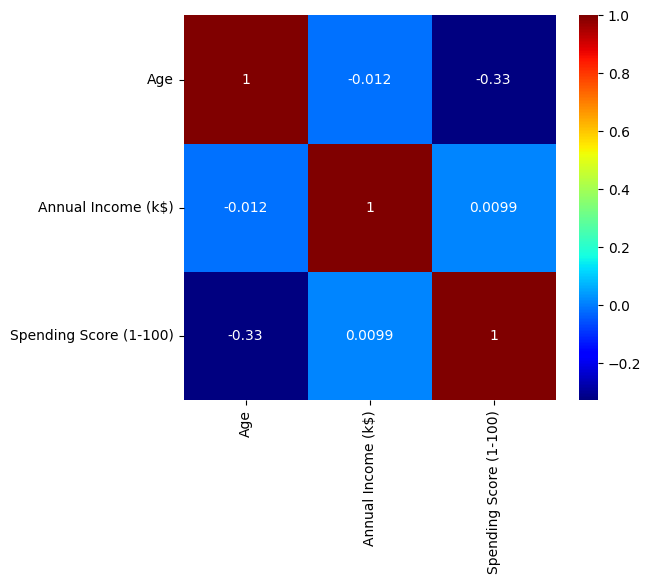

In [15]:
# Plotting the correlation of all the columns of the dataset.
corr = df.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot = True,linecolor='black',cmap='jet')
#plt.title ('corr of all variables', fontsize=16)

plt.show()

## 4. Clustering 

In this step, I apply K-means clustering to the dataset considering the *spending score*, *annual income*, and *age* fields.

### 4.1. Elbow method based on inertia

To find the optimal number of clusters in the feature space, I use inertia, which measures the Within Cluster Sum Of Squares (WCSS), the sum of the distances of observations from their cluster centroids. The smaller the inertia, the better the clustering for a given number of clusters. I measure the inertia for different cluster numbers from 1 to 10 and plot it against the number of clusters, which is known as the elbow graph. Looking at the x-axis, which represents the number of clusters, the optimal number of clusters is taken at the point of the elbow joint. This point is the most relevant number of clusters because from this point on the value of WCSS decreases very slightly. For my case, I will take 5 as the number of clusters according to the elbow graph.

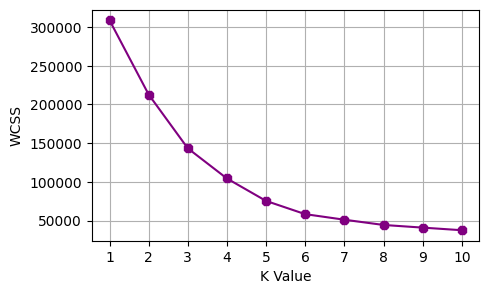

In [16]:
sse = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df.iloc[:,1:])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(5,3))    
plt.grid()
plt.plot(range(1,11),sse, color='purple', marker = '8')
plt.xlabel('K Value')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show()


### 4.2. K-means clustering

In [17]:
kmeans = KMeans(n_clusters=5)

clusters = kmeans.fit_predict(df.iloc[:,1:])

df['label'] = clusters

### 4.3. Visualization and evaluation

To analyze the results, I plot the samples in a 3D plot and two 2D plots where the clusters are represented by different colors.
The 2D plots represent the annual incomes and ages versus the spending scores. As can be seen, the customers are segmented into 5 very distinct groups based on the annual income and spending scores, which is intuitive from the feature space, including

- High annual income (> 70k) and high spending score ( > 60) - Yellow
- High annual income (> 70k) and low spending score (< 40) - Blue
- Low annual income (< 40k) and high spending score (> 60) - Red
- Low annual income (< 40k) and low spending score (< 40) - Green
- Average annual income (40k < < 70k) and average spending score (40 < < 60) - Brown

In addition, when looking at Spending Scores and Age:

- Average annual income and average spending score group (Brown) spread across all ages
- The high annual income and low spending score group (blue) is spread across the age range, but more towards the younger age groups.
- The low annual income and low spending score group (green) is mostly over the age of 35.
- The low annual income and high spending score (red) group is mostly in their 20s.
- The high annual income and high spending score (yellow) group is between 25 and 40 years old.



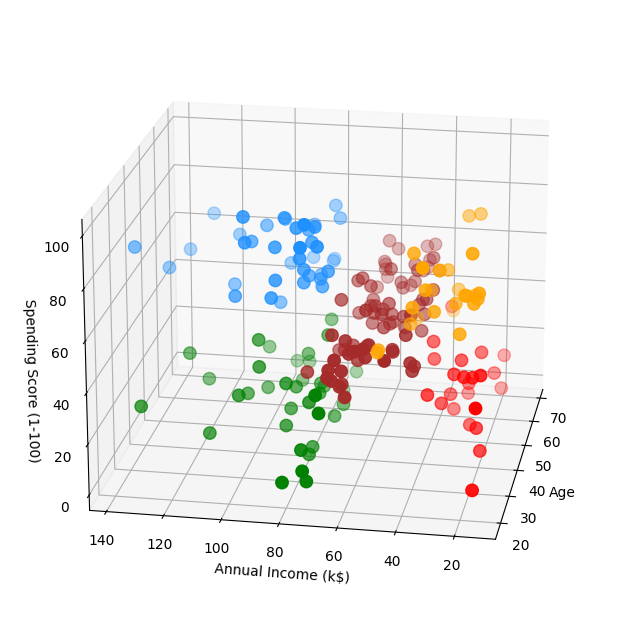

In [18]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='green', s=80)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='orange', s=80)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='brown', s=80)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='dodgerblue', s=80)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='red', s=80)

ax.view_init(20, 190)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

<AxesSubplot: title={'center': 'Spending Score VS Age'}, xlabel='Age', ylabel='Spending Score (1-100)'>

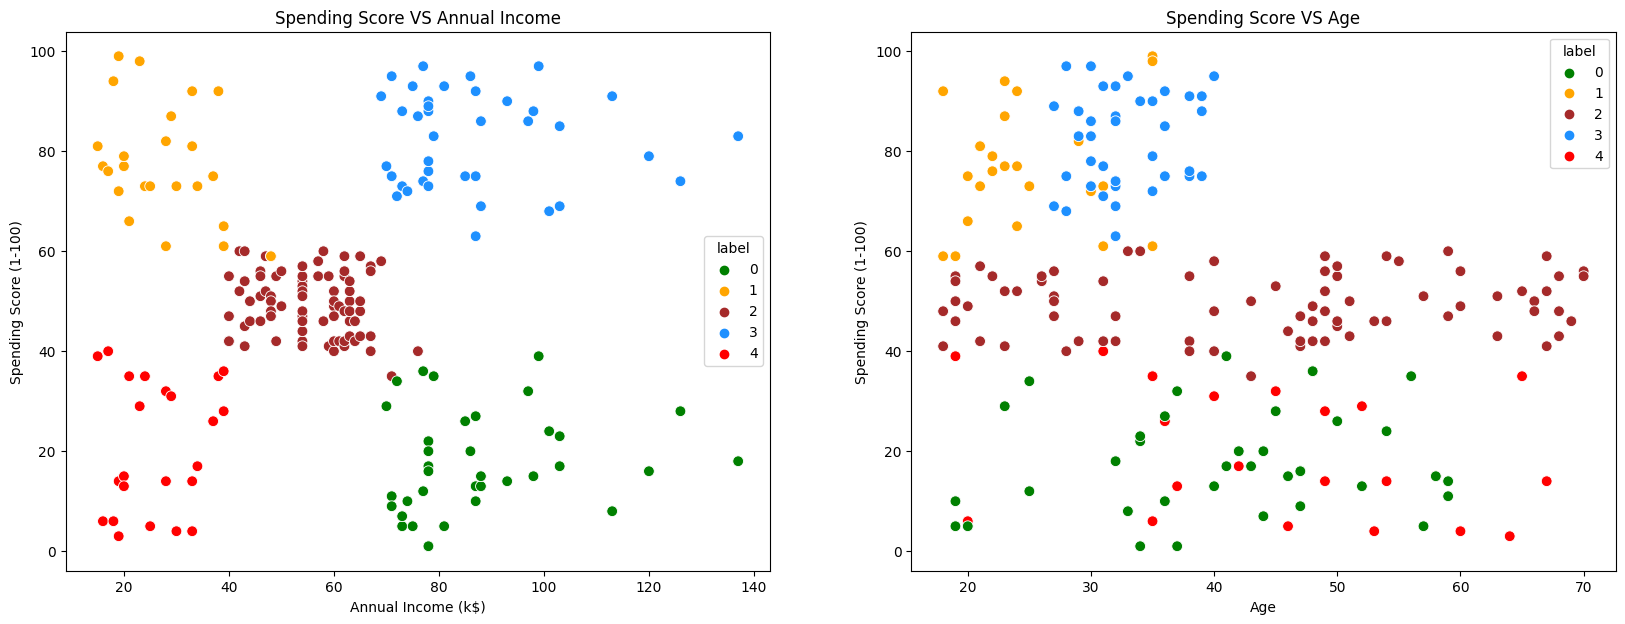

In [19]:
#Scatterplot of the clusters
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,7)
#plt.figure(figsize=(7,6))
ax[0].set_title('Spending Score VS Annual Income')
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60, ax=ax[0] )

ax[1].set_title('Spending Score VS Age')
sns.scatterplot(x = 'Age',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60, ax=ax[1] )


## 5. Conclusion

According to the characteristics of each group, we can target each customer group differently. The yellow and red groups generate the most revenue and require retention through marketing strategies such as loyalty programs or discounts. These groups are younger customers and their product preferences should also be considered. In addition, acquisition strategies may be more appropriate for the blue and green groups. Since they are from very different income groups, their different product preferences should be considered.

